<a href="https://colab.research.google.com/github/adib0073/python_tutorials/blob/main/GenAI_NLP_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Advanced LLM Programming Session (GenAI)

#### AGENDA
1. Quick recap of concepts taught before
2. REGEX in Python
3. Application on NLP concepts on text data

In [ ]:
# Quick recap

In [1]:
# REGEX in Python
import re # regex module (regular expressions)

In [4]:
txt = "The river in Spain"
x = re.search("^The.*Spain$", txt)
x

<re.Match object; span=(0, 18), match='The river in Spain'>

In [5]:
# findall()

txt = "The rain in Spain"
x = re.findall("ai", txt)
print(x)

txt = "The rain in Spain"
x = re.findall("Portugal", txt)
print(x)

['ai', 'ai']
[]


In [6]:
# search()

txt = "The rain in Spain"
x = re.search("\s", txt)

print(x)
print("The first white-space character is located in position:", x.start())

txt = "The rain in Spain"
x = re.search("Portugal", txt)
print(x)

<re.Match object; span=(3, 4), match=' '>
The first white-space character is located in position: 3
None


In [9]:
# split()
# Split at each white-space character:
txt = "The rain in Spain"
x = re.split("\s", txt)
print(x)

# You can control the number of occurrences by specifying the maxsplit parameter:
# Split the string only at the first occurrence:
txt = "The rain in Spain"
x = re.split("\s", txt, 1)
print(x)

['The', 'rain', 'in', 'Spain']
['The', 'rain in Spain']


In [ ]:
txt = "I am traveling to Spain. It could rain in Spain"

In [ ]:
'The', 'the'

In [11]:
str_txt = txt.lower()
str_txt

'the rain in spain'

In [ ]:
x = re.split("\s", str_txt)
list(set(x))

['spain.', 'am', 'i', 'it', 'in', 'rain', 'could', 'spain', 'traveling', 'to']

In [12]:
# Replace every white-space character with the number 9:
txt = "The rain in Spain"
x = re.sub("\s", "_", txt)
print(x)

# Replace the first 2 occurrences:
txt = "The rain in Spain"
x = re.sub("\s", "_", txt, 2)
print(x)

The_rain_in_Spain
The_rain_in Spain


Exercises:

1. Can you write a function in Python which can extract email addresses from text using Regex?
```
text = "Contact me at john.doe@example.com or jane@example.org for more information."
```

2. Can you write a function that uses regex to extract Python code from text data

```
# For example
input = """
Here is some Python code:

###python
import pandas as pd

df = pd.read_csv('file.csv')
df.shape()
print('Hello, world!')
# End of Python code.
###
"""
```

The output should be:
```
import pandas as pd

df = pd.read_csv('file.csv')
df.shape()
print('Hello, world!')
# End of Python code.

```

In [18]:
# Solution 1
import re

def extract_emails(text):
    # Regular expression pattern to match email addresses # alphanumeric@alphanumeric.alphanumeric
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

    # Find all email addresses in the text using the pattern
    emails = re.findall(email_pattern, text)

    return emails

# Example usage:
text = "Contact me at john.doe@example.co or jane@example.edu for more information."
emails = extract_emails(text)
print("Extracted emails:", emails)

Extracted emails: ['john.doe@example.co', 'jane@example.edu']


In [ ]:
print(""" +91122332223 """)

 'Hello' "World" 


In [ ]:
input = """
Here is some Python code:

==>python
import pandas as pd

df = pd.read_csv('file.csv')
df.shape()
print("Hello, world!")
# End of Python code.
==>
"""

In [ ]:
# Solution 2
import re

def extract_python_code(text):
    # Regular expression pattern to match Python code blocks
    python_pattern = r'==>python\s*([\s\S]*?)\s*==>'

    # Find all Python code blocks in the text using the pattern
    python_blocks = re.findall(python_pattern, text)

    return python_blocks

python_blocks = extract_python_code(input)
for idx, block in enumerate(python_blocks):
  print(f"Python code block {idx + 1}:\n{block}\n")

Python code block 1:
import pandas as pd

df = pd.read_csv('file.csv')
df.shape()
print("Hello, world!")
# End of Python code.



In [ ]:
python_blocks

['import pandas as pd\n\ndf = pd.read_csv(\'file.csv\')\ndf.shape()\nprint("Hello, world!")\n# End of Python code.']

#### Sentiment polarity dataset

https://www.cs.cornell.edu/people/pabo/movie-review-data/


In [ ]:
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from nltk import pos_tag

from wordcloud import WordCloud
import matplotlib.pyplot as plt, seaborn as sb
import os
from glob import glob

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import warnings
warnings.filterwarnings("ignore")

# !pip install swifter
import swifter #multi-threading/processing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Data Understanding & Cleaning

In [19]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  4416k      0  0:00:18  0:00:18 --:--:-- 8107k


In [ ]:
!ls

aclImdb  aclImdb_v1.tar.gz  sample_data


In [ ]:
!cat aclImdb/train/neg/5003_4.txt

I'm embarrassed to be writing this review. I say that because those of you reading it will know that I sat through the whole thing and that is embarrassing to admit even to strangers. But I just had to warn those who read the viewer comments on IMDb before they watch a film not to watch this one. It's the least I can do. This is a bad movie! Trust me. The plot is goofy. The acting is amateurish. And the directing, camera work, sets, costumes, etc. are all second rate. Let it go.

In [ ]:
!cat /content/aclImdb/test/pos/0_10.txt

I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.

In [ ]:
pos_files = glob('/content/aclImdb/train/pos/*')
neg_files = glob('/content/aclImdb/train/neg/*')

def read_txt(FilePath):
    with open(FilePath,'r') as fp:
        txt = fp.read()
    return txt

POS_TXTS = [read_txt(fp) for fp in pos_files]
NEG_TXTS = [read_txt(fp) for fp in neg_files]

In [ ]:
len(pos_files),len(neg_files)

(12500, 12500)

In [ ]:
temp = ['some text1','some text2']
print(['POS']*len(temp))
pd.DataFrame(zip(temp,['POS']*len(temp)))

['POS', 'POS']


,0,1
0,some text1,POS
1,some text2,POS


In [ ]:
list(zip([1,2,3],[4,5,6]))

[(1, 4), (2, 5), (3, 6)]

In [ ]:
# list(zip([1,2,3],[4,5,6]))

In [ ]:
Datax = pd.DataFrame(list(zip(POS_TXTS, [1]*len(POS_TXTS))) + list(zip(NEG_TXTS,[0]*len(NEG_TXTS))) ,
            columns =['text','target'])

In [ ]:
Datax.head()

,text,target
0,"As always, controversial movies like this have...",1
1,"Karen (Sarah Michelle Gellar), an exchange stu...",1
2,Hello Playmates.I recently watched this film f...,1
3,A brilliant chess player attends a tournament ...,1
4,"I've read reviews of Kerching on IMDb, and fra...",1


In [ ]:
Datax.tail()

,text,target
24995,story behind movie interest general plot bad d...,0
24996,science scare movie work well either truly ori...,0
24997,movie bad bad bad bad gotten way feel well mov...,0
24998,think biggest disappointment film right end ex...,0
24999,month ago involved debate another imdb poster ...,0


<Axes: ylabel='count'>

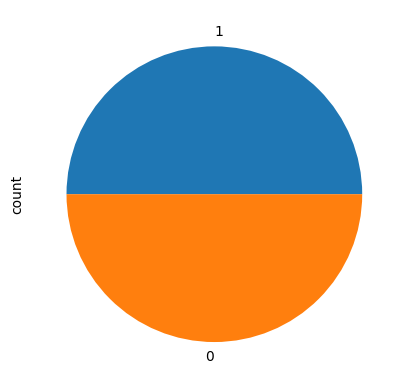

In [ ]:
Datax.target.value_counts().plot(kind='pie')

In [ ]:
Datax.iloc[0]['text']

'always controversial movie like mixed review either love hate everyone like movie show perspective killer something personally feel something important consider may hate may claim understand feel though relate regardless movie make think school shooting different perspective br br movie shot entirely use hand hold camera something think work quite well make realistic tell completely killer point view mission family outing lead big day zero day plan massacre school zero day offer answer merely present glimpse life two troubled young boy let audience decide feeling towards boy something mixed sympathy hatred yet leave confused two ordinary young boy would thing show surprisingly normal typical teenage boy lead ordinary life know plan expect thing make clear throughout whole movie one else know plan br br act extremely good consider two actor complete unknown hope see work future despite fictionalized movie one help notice obvious similarity columbine calvin andre scarily similar eric ha

In [ ]:
Datax.text = Datax.text.str.lower()
Datax.text = Datax.text.swifter.apply(lambda x:re.sub('[^a-zA-Z]',' ',x))
Datax.text = Datax.text.swifter.apply(lambda x:re.sub(' +',' ',x))

Pandas Apply:   0%|          | 0/25000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
pos_tag(["icing"])

[('icing', 'VBG')]

In [ ]:
# stemming
# playing -> play
# icing -> ic <=> (not) ice

In [ ]:
print("embarrassed :", lemmatizer.lemmatize("embarrassed", pos="v"))

embarrassed : embarrass


In [ ]:
sw = stopwords.words('english')
lem = WordNetLemmatizer()

def token_process(text):
    tokens = word_tokenize(text) # tokenize
    tokens = list(filter(lambda x:x not in sw , tokens)) # removing stopwords
    processed_token = []
    for w,pos in pos_tag(tokens): #part of speech tagging - required for lemmatization
        try:
            processed_token.append(lem.lemmatize(w,pos[0].lower())) #lemmatization
        except:
            processed_token.append(lem.lemmatize(w))
    processed_text = ' '.join(processed_token)
    return processed_text

In [ ]:
token_process('checking this function')

'check function'

In [ ]:
Datax.text = Datax.text.swifter.apply(token_process)

Pandas Apply:   0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
Datax.text

0        always controversial movie like mixed review e...
1        karen sarah michelle gellar exchange student j...
2        hello playmates recently watch film first time...
3        brilliant chess player attend tournament fall ...
4        read review kerching imdb frankly see one posi...
                               ...                        
24995    story behind movie interest general plot bad d...
24996    science scare movie work well either truly ori...
24997    movie bad bad bad bad gotten way feel well mov...
24998    think biggest disappointment film right end ex...
24999    month ago involved debate another imdb poster ...
Name: text, Length: 25000, dtype: object

In [ ]:
Datax.shape

(25000, 2)

In [ ]:
# pos_tag(word_tokenize('python is awesome'))

### EDA - Exploratory Data Analysis

In [ ]:
POS_WORDS = Datax[Datax.target==1].text.str.split().values.tolist()
NEG_WORDS = Datax[Datax.target==0].text.str.split().values.tolist()

POS_WORDS = [w for seq in POS_WORDS for w in seq]
NEG_WORDS = [w for seq in NEG_WORDS for w in seq]

In [ ]:
len(POS_WORDS), len(NEG_WORDS)

(1574358, 1515332)

In [ ]:
nltk.FreqDist(POS_WORDS).most_common(10)

[('br', 49236),
 ('film', 25256),
 ('movie', 22665),
 ('one', 14173),
 ('see', 10887),
 ('make', 10682),
 ('like', 10043),
 ('time', 8407),
 ('get', 8214),
 ('well', 7972)]

In [ ]:
nltk.FreqDist(NEG_WORDS).most_common(10)

[('br', 52636),
 ('movie', 29050),
 ('film', 22821),
 ('one', 13575),
 ('make', 12609),
 ('like', 12001),
 ('see', 9858),
 ('get', 9748),
 ('even', 7768),
 ('time', 7656)]

In [ ]:
POS_DIST = pd.DataFrame(nltk.FreqDist(POS_WORDS).items() ,columns = ['word','WordCount_pos'])
POS_DIST = POS_DIST.set_index('word')

NEG_DIST = pd.DataFrame(nltk.FreqDist(NEG_WORDS).items() ,columns = ['word','WordCount_neg'])
NEG_DIST = NEG_DIST.set_index('word')

In [ ]:
COM_DIST = POS_DIST.join(NEG_DIST)
COM_DIST = COM_DIST.fillna(1)
COM_DIST = COM_DIST[(COM_DIST.WordCount_pos +COM_DIST.WordCount_neg)>50]
COM_DIST['ratio'] = np.log(COM_DIST.WordCount_pos/COM_DIST.WordCount_neg)

In [ ]:
COM_DIST.sort_values(by='ratio',ascending=False).head(20)

,WordCount_pos,WordCount_neg,ratio
word,,,
paulie,118,1.0,4.770685
edie,109,1.0,4.691348
antwone,88,1.0,4.477337
gunga,66,1.0,4.189655
goldsworthy,65,1.0,4.174387
gypo,60,1.0,4.094345
yokai,60,1.0,4.094345
iturbi,53,1.0,3.970292
flavia,51,1.0,3.931826


In [ ]:
COM_DIST.sort_values(by='ratio',ascending=True).head(20)

,WordCount_pos,WordCount_neg,ratio
word,,,
boll,1,145.0,-4.976734
uwe,1,101.0,-4.615121
thunderbird,1,76.0,-4.330733
beowulf,1,60.0,-4.094345
dahmer,1,53.0,-3.970292
gram,1,50.0,-3.912023
wayans,1,50.0,-3.912023
seagal,4,152.0,-3.637586
gamera,2,55.0,-3.314186


In [ ]:
wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      colormap = 'viridis', max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 0)

In [ ]:
most_freq_neg = COM_DIST.sort_values(by='ratio',ascending=True).head(50).index

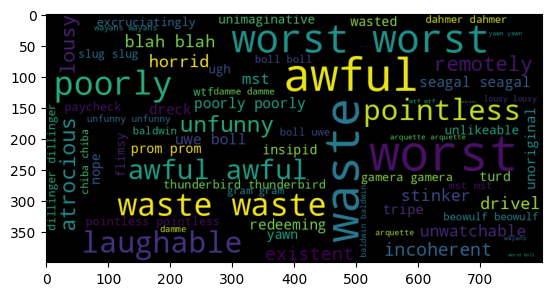

In [ ]:
wordcloud.generate(' '.join([w for w in NEG_WORDS if w in most_freq_neg.tolist()]))
plt.imshow(wordcloud)


## Feature Extraction

The text needs to be transformed to vectors so as the algorithms will be able make predictions. In this case it will be used the Term Frequency – Inverse Document Frequency (TFIDF) weight to evaluate __how important a word is to a document in a collection of documents__.

After removing __punctuation__ and __lower casing__ the words, importance of a word is determined in terms of its frequency.

### “Term Frequency – Inverse Document Frequency

__TF-IDF__ is the product of the __TF__ and __IDF__ scores of the term.<br><br> $$\text{TF-IDF}=\frac{\text{TF}}{\text{IDF}}$$<br>

__Term Frequency :__ This summarizes how often a given word appears within a document.

$$\text{TF} = \frac{\text{Number of times the term appears in the doc}}{\text{Total number of words in the doc}}$$<br><br>
__Inverse Document Frequency:__ This downscales words that appear a lot across documents. A term has a high IDF score if it appears in a few documents. Conversely, if the term is very common among documents (i.e., “the”, “a”, “is”), the term would have a low IDF score.<br>

$$\text{IDF} = \ln\left(\frac{\text{Number of docs}}{\text{Number docs the term appears in}} \right)$$<br>

TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The higher the TFIDF score, the rarer the term is. For instance, in a Mortgage complaint the word _mortgage_ would be mentioned fairly often. However, if we look at other complaints, _mortgage_ probably would not show up in many of them. We can infer that _mortgage_ is most probably an important word in Mortgage complaints as compared to the other products. Therefore, _mortgage_ would have a high TF-IDF score for Mortgage complaints.

TfidfVectorizer class can be initialized with the following parameters:
* __min_df__: remove the words from the vocabulary which have occurred in less than ‘min_df’ number of files.
* __max_df__: remove the words from the vocabulary which have occurred in more than _‘max_df’ * total number of files in corpus_.
* __sublinear_tf__: set to True to scale the term frequency in logarithmic scale.
* __stop_words__: remove the predefined stop words in 'english'.
* __use_idf__: weight factor must use inverse document frequency.
* __ngram_range__: (1, 2) to indicate that unigrams and bigrams will be considered.

In [ ]:
X = Datax.text.values
y = Datax.target.values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
td = TfidfVectorizer(max_features = 10000, ngram_range=(1,3))
X_train = td.fit_transform(X_train).toarray()
X_test = td.transform(X_test).toarray()

In [ ]:
X_train.shape , X_test.shape

((20000, 10000), (5000, 10000))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report

clf_report = classification_report(y_test,y_pred)
print(F'ACC : {accuracy_score(y_test,y_pred)}')
print(clf_report)

ACC : 0.8616
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2504
           1       0.85      0.88      0.86      2496

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [ ]:
rf = RandomForestClassifier(n_estimators= 50)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report

clf_report = classification_report(y_test,y_pred_rf)
print(F'ACC : {accuracy_score(y_test,y_pred_rf)}')
print(clf_report)

ACC : 0.8346
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2504
           1       0.85      0.82      0.83      2496

    accuracy                           0.83      5000
   macro avg       0.84      0.83      0.83      5000
weighted avg       0.84      0.83      0.83      5000



In [ ]:
rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report

clf_report = classification_report(y_test,y_pred_rf)
print(F'ACC : {accuracy_score(y_test,y_pred_rf)}')
print(clf_report)

ACC : 0.8496
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2504
           1       0.86      0.84      0.85      2496

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [ ]:
rf.predict_proba([X_test[0]])

array([[0.785, 0.215]])

In [ ]:
X_test[0].shape

(10000,)